# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
_action_size = brain.vector_action_space_size
print('Size of each action:', _action_size)

# examine the state space 
states = env_info.vector_observations
_state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], _state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, _action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print(" actions: {} \n next_states: {} \n rewards: {} \n dones:{}".format(actions, next_states, rewards,dones))

def sample_action():
    actions = np.random.randn(num_agents, _action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)   
    return actions

Total score (averaged over agents) this episode: 0.11249999748542905
 actions: [[-0.80202372 -0.64595073 -1.         -0.09200729]
 [ 0.08407106  1.         -0.55802785  1.        ]
 [ 0.33091339 -1.         -0.49697184  1.        ]
 [ 0.55986773  1.          0.03170572 -0.07953299]
 [ 0.07244001 -1.          0.30228174  0.29268759]
 [-0.24286019 -0.09462725  1.         -0.19312397]
 [-0.73704246 -0.61721233 -1.          0.17060655]
 [-0.66810271  1.          0.26785518 -0.07209966]
 [-1.         -0.86056674  0.95740469  1.        ]
 [ 0.40624246  0.36607944  0.24282788  1.        ]
 [ 0.82772132 -0.31462511 -1.          0.1405588 ]
 [-0.36357583 -0.00973785  0.86679903  1.        ]
 [-0.26404608  1.         -0.56896898  1.        ]
 [ 0.81553518  0.40768831  0.56400784  0.48335397]
 [ 1.         -0.77640282 -0.95020685 -1.        ]
 [-0.27930877 -1.         -0.06080069 -1.        ]
 [ 0.25106899  0.63360438 -0.92735936  1.        ]
 [-1.         -1.         -0.48526025 -0.31253055]
 [ 

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## 5. The Project

#### 5.1 The tools

In [7]:
from collections import namedtuple, deque
import random

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, dev):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.dev = dev
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.dev)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(self.dev)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.dev)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.dev)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.dev)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    

#### 5.2 The brains

In [8]:
import torch.nn as nn
import torch
import numpy as np


def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

def init_layers(layers, init_custom):
    for layer in layers:
        if hasattr(layer,"weight"):
            if init_custom:
                layer.weight.data.uniform_(*hidden_init(layer))
            else:
                nn.init.xavier_uniform_(layer.weight)

        if hasattr(layer,"bias"):
            if layer.bias is not None:
                if init_custom:
                    layer.bias.data.uniform_(*hidden_init(layer))
                else:
                    nn.init.xavier_uniform_(layer.bias)
                

class Actor(nn.Module):
    def __init__(self, input_size, output_size, layers=[256, 128], init_custom=True, use_pre_bn=True, use_post_bn=True):
        """
        The configurable Actor module
        layers: configurable stream of layers - allways outputs a tanh
        init_custom : will use uniform distrib  1 / sqrt(fan_in) instead of xavier uniform initialization
        """
        super(Actor, self).__init__()
        self.layers = nn.ModuleList()
        self.init_custom = init_custom
        pre_units = input_size
        if use_pre_bn:
            self.layers.append(nn.BatchNorm1d(pre_units))
        
        for i,L in enumerate(layers):
            if i == 0:
                use_bias = not use_bn
            else:
                use_bias = True
            self.layers.append(nn.Linear(pre_units, L, bias=use_bias))
            if use_post_bn:
                self.layers.append(nn.BatchNorm1d(L))
            self.layers.append(nn.ReLU())
            pre_units = L
        self.final_linear = nn.Linear(pre_units, output_size)
        self.final_activation = nn.Tanh()
        self.reset_parameters()
        return
        
        
    def reset_parameters(self):            
        init_layers(self.layers, self.init_custom)                    
        nn.init.uniform_(self.final_linear.weight, -0.003, 0.003)  
        nn.init.uniform_(self.final_linear.bias, -0.003, 0.003)  
        return
    
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.final_linear(x)
        x = self.final_activation(x)
        return x
    

class Critic(nn.Module):
    def __init__(self, state_size, act_size, output_size=1, leaky=False, init_custom=True,
                 act_layers=[], 
                 state_layers=[256], 
                 final_layers=[256, 128],
                 state_bn=True,
                 other_bn=True,
                 ):
        """
        The Critic module can be easily configured to almost any number of layers. It currently support three main
        graph streams: 
        act_layers   : the action stream that is by default with no layers. This streams processes the action input
        state_layers : the state stream is responsible for the generation of high-level features for the observation
        final_layers : the final stream that gets the concatenated action/state streams and generates the value
        leay : will use LeakyReLU for all activations instead of ReLU
        init_custom : will use uniform distrib  1 / sqrt(fan_in) instead of xavier uniform initialization
        """
        super(Critic, self).__init__()
        self.init_custom = init_custom
        
        self.final_layers = nn.ModuleList()

        pre_units = state_size
        if len(state_layers) > 0:
            self.state_layers = nn.ModuleList()
            for L in state_layers:
                self.state_layers.append(nn.Linear(pre_units, L))
                if state_bn:
                    self.state_layers.append(nn.BatchNorm1d(L))
                if leaky:
                    self.state_layers.append(nn.LeakyReLU())
                else:
                    self.state_layers.append(nn.ReLU())
                pre_units = L
        final_state_column_size = pre_units

        pre_units = act_size
        if len(act_layers) > 0:
            self.act_layers = nn.ModuleList()
            for L in act_layers:
                self.act_layers.append(nn.Linear(pre_units, L))
                if state_bn:
                    self.act_layers.append(nn.BatchNorm1d(L))                    
                if leaky:
                    self.act_layers.append(nn.LeakyReLU())
                else:
                    self.act_layers.append(nn.ReLU())
                pre_units = L
        final_action_column_size = pre_units
            
        pre_units = final_state_column_size + final_action_column_size
        for L in final_layers:
            self.final_layers.append(nn.Linear(pre_units, L))
            if other_bn:
                self.final_layers.append(nn.BatchNorm1d(L))                    
            if leaky:
                self.final_layers.append(nn.LeakyReLU())
            else:
                self.final_layers.append(nn.ReLU())
            pre_units = L        
            
        self.final_linear = nn.Linear(pre_units, output_size)
        self.reset_parameters()
        return
    
        
    def reset_parameters(self):
        if hasattr(self, "state_layers"):
            init_layers(self.state_layers, self.init_custom)
            
        if hasattr(self, "act_layers"):
            init_layers(self.act_layers, self.init_custom)
            
        init_layers(self.final_layers, self.init_custom)
            
        nn.init.uniform_(self.final_linear.weight, -0.003, 0.003)
        nn.init.uniform_(self.final_linear.bias, -0.003, 0.003)
        return
        
        
    def forward(self, state, action):
        x_state = state
        if hasattr(self, "state_layers"):
            for layer in self.state_layers:
                x_state = layer(x_state)
            
        x_act = action
        if hasattr(self, "act_layers"):
            for layer in self.act_layers:
                x_act = layer(x_act)
        
        x = torch.cat((x_state, x_act), dim=1)
        
        for layer in self.final_layers:
            x = layer(x)    
        
        x = self.final_linear(x)
        return x


def layers_stats(model):
    print("Model {} min/max/mean/median:".format(model.__class__.__name__))
    for name, param in model.named_parameters():
        data = param.detach().cpu().numpy()
        print("  {:<25}  {:>8.1e} / {:>8.1e} / {:>8.1e} / {:>8.1e}".format(
            name+":", data.min(), data.max(), data.mean(), np.median(data)))
    
act_test = Actor(input_size=33, output_size=4)
cri_test = Critic(state_size=33, act_size=4)
print("Actor DAG:\n{}".format(act_test))
print("Critic DAG:\n{}".format(cri_test))

act_f_layer = act_test.final_linear.weight.detach().numpy()
print(act_f_layer.min(), act_f_layer.max(), act_f_layer.mean())


layers_stats(act_test)
    

Actor DAG:
Actor(
  (layers): ModuleList(
    (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=33, out_features=256, bias=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (final_linear): Linear(in_features=128, out_features=4, bias=True)
  (final_activation): Tanh()
)
Critic DAG:
Critic(
  (final_layers): ModuleList(
    (0): Linear(in_features=260, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (state_layers): ModuleList(
    (0): 

#### 5.3 The agent

In [9]:

import torch.optim as optim
import torch.nn.functional as F

class Agent():
    """
    Implements DDPG TD3 approach with a few tricks
    """
    def __init__(self, a_size, s_size, dev, 
                 n_env_agents,
                 GAMMA=0.99, 
                 TAU=5e-3, 
                 policy_noise=0.2, 
                 exploration_noise=0.1, 
                 noise_clip=0.5,
                 LR_CRITIC=1e-3, 
                 LR_ACTOR=1e-3, 
                 WEIGHT_DECAY=0, 
                 policy_freq=2, 
                 random_seed=1234,
                 BUFFER_SIZE=int(1e5), 
                 BATCH_SIZE=128, 
                 RANDOM_WARM_UP=1024,
                 name='agent',
                 simplified_critic=False,
                 critic_use_state_bn=True,
                 critic_use_other_bn=True,
                 actor_use_bn=True,
                ):
        self.a_size = a_size
        self.n_env_agents = n_env_agents
        self.name = name
        self.s_size = s_size
        self.MIN_EXPL_NOISE = 0.03
        self.MIN_POLI_NOISE = 0.05
        self.dev = dev
        self.device = dev
        self.GAMMA = GAMMA
        self.TAU = 0.05
        self.RANDOM_WARM_UP = RANDOM_WARM_UP
        self.noise_clip = noise_clip
        self.exploration_noise = exploration_noise
        self.policy_noise = policy_noise
        self.policy_freq = policy_freq
        self.BATCH_SIZE = BATCH_SIZE
        if simplified_critic:
            critic_state_layers = []
        else:
            critic_state_layers = [256]
            
            
            
        self.actor_online = Actor(input_size=self.s_size,
                                  output_size=self.a_size, 
                                  use_pre_bn=actor_use_bn,
                                  use_post_bn=True,
                                 ).to(self.dev)
        self.actor_target = Actor(input_size=self.s_size, 
                                  output_size=self.a_size, 
                                  use_pre_bn=actor_use_bn,
                                  use_post_bn=True,
                                 ).to(self.dev)
        self.actor_target.load_state_dict(self.actor_online.state_dict())
        self.actor_optimizer = optim.Adam(self.actor_online.parameters(), lr=LR_ACTOR)
        
        self.critic_online_1 = Critic(state_size=self.s_size, 
                                      act_size=self.a_size, 
                                      state_layers=critic_state_layers, 
                                      state_bn=critic_use_state_bn, 
                                      other_bn=critic_use_other_bn).to(self.dev)
        self.critic_target_1 = Critic(state_size=self.s_size, 
                                      act_size=self.a_size, 
                                      state_layers=critic_state_layers, 
                                      state_bn=critic_use_state_bn, 
                                      other_bn=critic_use_other_bn).to(self.dev)
        self.critic_target_1.load_state_dict(self.critic_online_1.state_dict())
        self.critic_1_optimizer = optim.Adam(self.critic_online_1.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.critic_online_2 = Critic(state_size=self.s_size, 
                                      act_size=self.a_size, 
                                      state_layers=critic_state_layers, 
                                      state_bn=critic_use_state_bn, 
                                      other_bn=critic_use_other_bn).to(self.dev)
        self.critic_target_2 = Critic(state_size=self.s_size, 
                                      act_size=self.a_size, 
                                      state_layers=critic_state_layers, 
                                      state_bn=critic_use_state_bn, 
                                      other_bn=critic_use_other_bn).to(self.dev)
        self.critic_target_2.load_state_dict(self.critic_online_2.state_dict())
        self.critic_2_optimizer = optim.Adam(self.critic_online_2.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.memory = ReplayBuffer(self.a_size, BUFFER_SIZE, BATCH_SIZE, random_seed, dev=self.dev)
        self.step_counter = 0
        self.steps_to_train_counter = 0
        self.skip_update_timer = 0
        self.train_iters = 0
        self.actor_updates = 0
        self.critic_1_losses = deque(maxlen=100)
        self.critic_2_losses = deque(maxlen=100)
        self.actor_losses = deque(maxlen=100)
        print("Agent '{}' initialized with the following parameters:".format(self.name))
        print("   Env agents:   {}".format(self.n_env_agents))
        print("   Explor noise: {:>6.4f}".format(self.exploration_noise))
        print("   Policy noise: {:>6.4f}".format(self.policy_noise))
        print("   Warm-up size: {:>6}".format(self.RANDOM_WARM_UP))
        print("Actor DAG:\n{}\nCritic DAG:\n{}".format(self.actor_online, self.critic_online_1))
        
        return
    

    def step(self, states, actions, rewards, next_states, dones, train_every_steps):
        """Save experience in replay memory. train if required
        The approach consists in letting the policy run "free" for `train_every_steps` steps and then train another 
        `train_every_steps` at each step.
        """
        # Save experience / reward
        self.step_counter += 1
        for _a in range(self.n_env_agents):
            self.memory.add(states[_a], actions[_a], rewards[_a], next_states[_a], dones[_a])
        
        if not self.is_warming_up():
            if self.steps_to_train_counter > 0:
                self.train(nr_iters=1)
                self.steps_to_train_counter -= 1
                self.skip_update_timer = 0
            else:
                self.skip_update_timer += 1

            if self.skip_update_timer >= train_every_steps:
                self.steps_to_train_counter = train_every_steps # // 2 # only half training
                self.skip_update_timer = 0            
        return
    
    def reduce_explore_noise(self, down_scale=0.9):
        self.exploration_noise = max(self.MIN_EXPL_NOISE, self.exploration_noise * down_scale)
        print("\nNew explor noise: {:.4f}".format(self.exploration_noise))
        return
    
    
    def reduce_policy_noise(self, down_scale=0.9):
        self.policy_noise = max(self.MIN_POLI_NOISE, self.policy_noise * down_scale)
        print("\nNew policy noise: {:.4f}".format(self.policy_noise))
        return
        
        
    def reduce_noise(self, down_scale):
        self.reduce_explore_noise(down_scale)
        self.reduce_policy_noise(down_scale)
        return
    
    def clear_policy_noise(self):
        if self.policy_noise != 0:
            self.policy_noise = 0
            print("\nPolicy noise stopped!")
        return
    
    def clear_explore_noise(self):
        if self.exploration_noise != 0:
            self.exploration_noise = 0
            print("\nExploration noise stopped")
        return


    def train(self, nr_iters):
        """ use random sample from buffer to learn """
        # Learn, if enough samples are available in memory
        if len(self.memory) > self.RANDOM_WARM_UP:
            for _ in range(nr_iters):
                experiences = self.memory.sample()
                self._train(experiences, self.GAMMA)    
        return
    
    def is_warming_up(self):
        return len(self.memory) < self.RANDOM_WARM_UP
    
    
    def act(self, states, add_noise=False):
        """Returns actions for given state as per current policy."""
        if len(states.shape) == 1:
            states = states.reshape(1,-1)
        t_states = torch.from_numpy(states).float().to(self.device)
        self.actor_online.eval()
        with torch.no_grad():
            np_actions = self.actor_online(t_states).cpu().data.numpy()
        self.actor_online.train()
        if add_noise:
            # we are obviously in training so now check if the "act" was called before warmpup
            assert not self.is_warming_up()
            noise = np.random.normal(loc=0, scale=self.exploration_noise, size=np_actions.shape)
            np_actions += noise
        return np.clip(np_actions, -1, 1)
    
    
    def _train(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences: tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        self.train_iters += 1
        if self.train_iters == 1:
            print("\nFirst training iter at step {} (memory={})".format(self.step_counter, len(self.memory)))
        states, actions, rewards, next_states, dones = experiences
        actions_ = actions.cpu().numpy()
    
        actions_next = self.actor_target(next_states)
        noise = torch.FloatTensor(actions_).data.normal_(0, self.policy_noise).to(self.device)
        noise = torch.clamp(noise, -self.noise_clip, self.noise_clip)
        actions_next += noise
        actions_next = torch.clamp(actions_next, -1, 1)
        
        Q_targets_next_1 = self.critic_target_1(next_states, actions_next)
        Q_targets_next_2 = self.critic_target_2(next_states, actions_next)
        
        Q_targets_next = torch.min(Q_targets_next_1, Q_targets_next_2)
        
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)).detach()

        # Compute critic loss 1
        Q_expected_1 = self.critic_online_1(states, actions)
        critic_1_loss = F.mse_loss(Q_expected_1, Q_targets)
        # Minimize the loss for critic 1
        self.critic_1_optimizer.zero_grad()
        critic_1_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_online_1.parameters(), 1)
        self.critic_1_optimizer.step()
        self.np_loss_1 = critic_1_loss.detach().cpu().item()

        
        # Compute critic loss 2
        Q_expected_2 = self.critic_online_2(states, actions)
        critic_2_loss = F.mse_loss(Q_expected_2, Q_targets)
        # Minimize the loss for critic 2
        self.critic_2_optimizer.zero_grad()
        critic_2_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_online_2.parameters(), 1)
        self.critic_2_optimizer.step()
        self.np_loss_2 = critic_2_loss.detach().cpu().item()
        
        self.critic_1_losses.append(self.np_loss_1)
        self.critic_2_losses.append(self.np_loss_2)
        
        if (self.train_iters % self.policy_freq) == 0:
            actions_pred = self.actor_online(states)
            actor_loss = -self.critic_online_1(states, actions_pred).mean()
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()
            self.np_loss_actor = actor_loss.detach().cpu().item()
            
            self.soft_update_actor()
            self.soft_update_critics()
            
            self.actor_losses.append(self.np_loss_actor)
            self.actor_updates += 1
            
        return

    def save(self, label):
        fn = '{}_actor_it_{:010}_{}.policy'.format(self.name, self.train_iters, label)
        torch.save(self.actor_online.state_dict(), fn)
        return

    
    def soft_update_actor(self):
        self._soft_update(self.actor_online, self.actor_target, self.TAU)
        return

        
    def soft_update_critics(self):
        self._soft_update(self.critic_online_1, self.critic_target_1, self.TAU)
        self._soft_update(self.critic_online_2, self.critic_target_2, self.TAU)
        return
        
        
    def _soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)    
        return
    
    def debug_weights(self):
        layers_stats(self.actor_online)
        layers_stats(self.critic_online_1)
        return


#### 5.4 The loop

The search grid contains 6 iterations:
  abn_cdbn_f_noi
  abn_csbn_conn_f_noi
  abn_cdnn_f_noi
  ann_cdbn_f_noi
  ann_csbn_conn_f_noi
  ann_cdnn_f_noi


Starting grid search iteration 1/6:'m_cuda_abn_cdbn_f_noi'
Agent 'm_cuda_abn_cdbn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=33, out_features=256, bias=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (final_linear): Linear(in_features=128, out_features=4, bias=True)
  (final_activation): Tanh()
)
Critic DAG:
Critic(
  (final_layers): ModuleList(
  

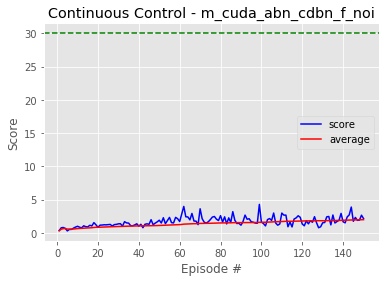

                   MODEL  EP_SOL  BEST_AVG      AVG1      AVG2     AVG3      AVG4
0  m_cuda_abn_cdbn_f_noi       0   1.98037  0.974758  1.426218  1.79118  1.956805


Starting grid search iteration 2/6:'m_cuda_abn_csbn_conn_f_noi'
Agent 'm_cuda_abn_csbn_conn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=33, out_features=256, bias=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (final_linear): Linear(in_features=128, out_features=4, bias=True)
  (final_activation): Tanh()
)
Critic DAG:
Critic(
  (final_

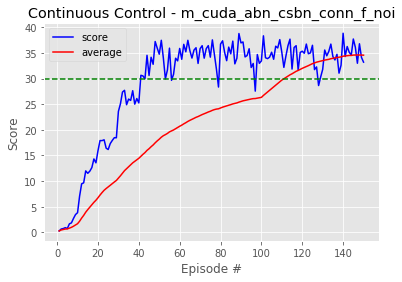

                        MODEL  EP_SOL   BEST_AVG       AVG1       AVG2       AVG3       AVG4
0       m_cuda_abn_cdbn_f_noi       0   1.980370   0.974758   1.426218   1.791180   1.956805
1  m_cuda_abn_csbn_conn_f_noi     112  34.587639  11.039290  22.966323  32.151254  34.585609


Starting grid search iteration 3/6:'m_cuda_abn_cdnn_f_noi'
Agent 'm_cuda_abn_cdnn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=33, out_features=256, bias=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (final_linear): Linear

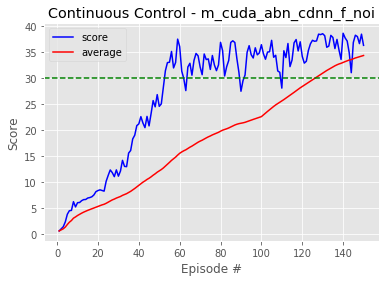

                        MODEL  EP_SOL   BEST_AVG       AVG1       AVG2       AVG3       AVG4
0       m_cuda_abn_cdbn_f_noi       0   1.980370   0.974758   1.426218   1.791180   1.956805
2       m_cuda_abn_cdnn_f_noi     127  34.315164   7.236935  18.045978  28.607939  33.837529
1  m_cuda_abn_csbn_conn_f_noi     112  34.587639  11.039290  22.966323  32.151254  34.585609


Starting grid search iteration 4/6:'m_cuda_ann_cdbn_f_noi'
Agent 'm_cuda_ann_cdbn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (final_linear): Lin

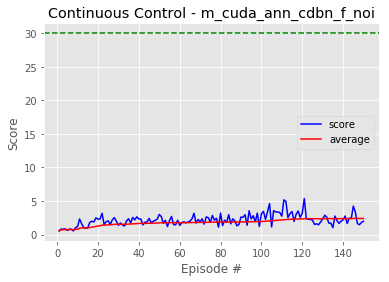

                        MODEL  EP_SOL   BEST_AVG       AVG1       AVG2       AVG3       AVG4
0       m_cuda_abn_cdbn_f_noi       0   1.980370   0.974758   1.426218   1.791180   1.956805
3       m_cuda_ann_cdbn_f_noi       0   2.419435   1.542839   1.823669   2.368325   2.419435
2       m_cuda_abn_cdnn_f_noi     127  34.315164   7.236935  18.045978  28.607939  33.837529
1  m_cuda_abn_csbn_conn_f_noi     112  34.587639  11.039290  22.966323  32.151254  34.585609


Starting grid search iteration 5/6:'m_cuda_ann_csbn_conn_f_noi'
Agent 'm_cuda_ann_csbn_conn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, ep

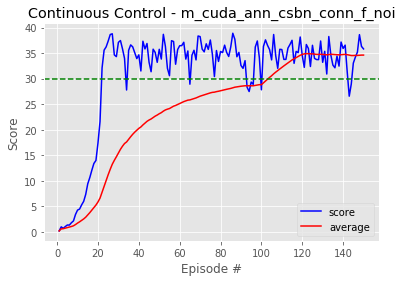

                        MODEL  EP_SOL   BEST_AVG       AVG1       AVG2       AVG3       AVG4
0       m_cuda_abn_cdbn_f_noi       0   1.980370   0.974758   1.426218   1.791180   1.956805
3       m_cuda_ann_cdbn_f_noi       0   2.419435   1.542839   1.823669   2.368325   2.419435
2       m_cuda_abn_cdnn_f_noi     127  34.315164   7.236935  18.045978  28.607939  33.837529
1  m_cuda_abn_csbn_conn_f_noi     112  34.587639  11.039290  22.966323  32.151254  34.585609
4  m_cuda_ann_csbn_conn_f_noi     104  34.904369  16.149774  26.696577  34.855264  34.556034


Starting grid search iteration 6/6:'m_cuda_ann_cdnn_f_noi'
Agent 'm_cuda_ann_cdnn_f_noi' initialized with the following parameters:
   Env agents:   20
   Explor noise: 0.1000
   Policy noise: 0.2000
   Warm-up size:   1024
Actor DAG:
Actor(
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3)

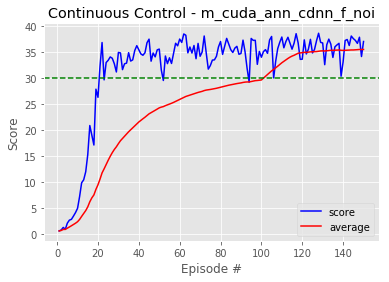

                        MODEL  EP_SOL   BEST_AVG       AVG1       AVG2       AVG3       AVG4
0       m_cuda_abn_cdbn_f_noi       0   1.980370   0.974758   1.426218   1.791180   1.956805
3       m_cuda_ann_cdbn_f_noi       0   2.419435   1.542839   1.823669   2.368325   2.419435
2       m_cuda_abn_cdnn_f_noi     127  34.315164   7.236935  18.045978  28.607939  33.837529
1  m_cuda_abn_csbn_conn_f_noi     112  34.587639  11.039290  22.966323  32.151254  34.585609
4  m_cuda_ann_csbn_conn_f_noi     104  34.904369  16.149774  26.696577  34.855264  34.556034
5       m_cuda_ann_cdnn_f_noi     102  35.516939  17.972500  27.464337  34.969764  35.458929


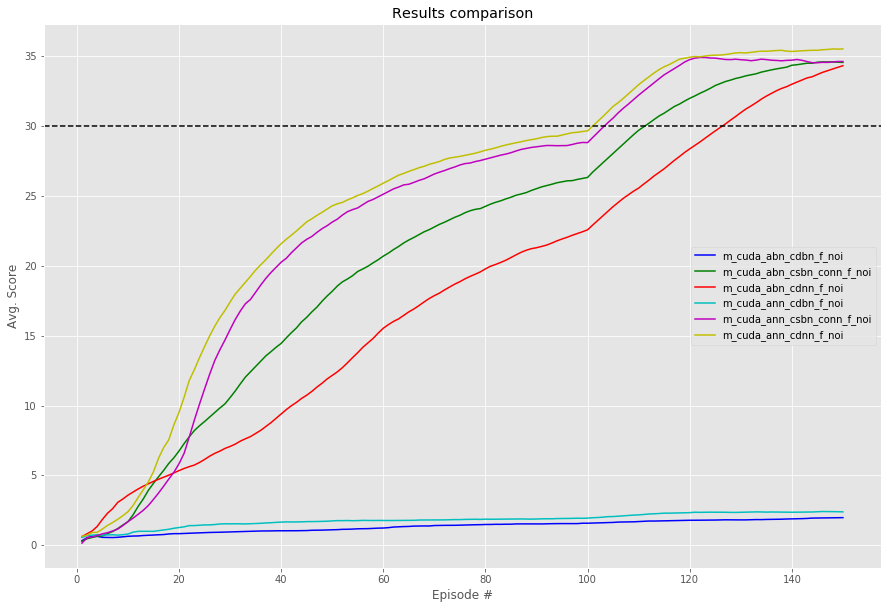

In [10]:
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
import pandas as pd

np.set_printoptions(precision=4)
np.set_printoptions(linewidth=130)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)     

def training_loop(env, agent, n_episodes, policy_noise_reduction, explor_noise_reduction,
                  stop_policy_noise=0, stop_explor_noise=0,
                  max_t=10000, train_every_steps=10,
                  DEBUG=1,
                 ):
    
    print("Starting training for {} episodes...".format(n_episodes))
    print("  explor_noise_reduction={}".format(explor_noise_reduction))
    print("  policy_noise_reduction={}".format(policy_noise_reduction))
    print("  stop_policy_noise={}".format(stop_policy_noise))
    print("  stop_explor_noise={}".format(stop_explor_noise))
    solved_episode = 0
    scores_deque = deque(maxlen=100)
    steps_deque = deque(maxlen=100)
    scores_avg = []
    scores = []
    ep_times = []
    for i_episode in range(1, n_episodes+1):
        t_start = time.time()
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        np_score = np.zeros(num_agents)        
        for t in range(max_t):
            if agent.is_warming_up():
                actions = sample_action()
            else:
                actions = agent.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones, train_every_steps=train_every_steps)
            states = next_states
            np_score += rewards
            if np.any(dones):
                break           
        if train_every_steps==0:
            agent.train(nr_iters=t//10)
        episode_max = np_score.max()
        score = np_score.mean()
        scores_deque.append(score)
        scores.append(score)
        scores_avg.append(np.mean(scores_deque))
        steps_deque.append(t)
        t_end = time.time()
        ep_time = t_end - t_start
        ep_times.append(ep_time)
        _cl1 = np.mean(agent.critic_1_losses)
        _cl2 = np.mean(agent.critic_2_losses)
        _al = np.mean(agent.actor_losses)
        max_score = np.max(scores_deque)
        print('\rEpisode {:>4}  Score/M100/Avg: {:>4.1f}/{:>4.1f}/{:>4.1f}  Steps: {:>4}  [μcL1/μcL2: {:>8.1e}/{:>8.1e} μaL: {:>8.1e}]  t:{:>4.1f}s    '.format(
            i_episode, score, max_score, np.mean(scores_deque), t, _cl1,_cl2, _al, ep_time), end="", flush=True)
        if (np.mean(scores_deque) > 30) and (solved_episode == 0):
            print("\nEnvironment solved at episode {}!".format(i_episode))
            agent.save('ep_{}_solved'.format(i_episode))
            solved_episode = i_episode
        if i_episode % 50 == 0:
            mean_ep = np.mean(ep_times)
            elapsed = i_episode * mean_ep
            total = (n_episodes + 1) * mean_ep
            left_time_hrs = (total - elapsed) / 3600            
            print('\rEpisode {:>4}  Score/M100/Avg: {:>4.1f}/{:>4.1f}/{:>4.1f}  AvStp: {:>4.0f}  [μcL1/μcL2: {:>8.1e}/{:>8.1e} μaL: {:>8.1e}]  t-left:{:>4.1f} h    '.format(
                i_episode, score, max_score, np.mean(scores_deque), np.mean(steps_deque), _cl1,_cl2, _al, left_time_hrs))
            if DEBUG >= 1:
                print("  Loaded steps: {:>10} (Replay memory: {})".format(agent.step_counter, len(agent.memory)))
                print("  Critic/Actor updates:  {:>10} / {:>10}".format(agent.train_iters, agent.actor_updates))
            if DEBUG >= 2:
                agent.debug_weights()
            if explor_noise_reduction:
                agent.reduce_explore_noise(0.8)
            if policy_noise_reduction:
                agent.reduce_policy_noise(0.8)
        if stop_policy_noise>0 and i_episode >= stop_policy_noise:
            agent.clear_policy_noise()
        if stop_explor_noise>0 and i_episode >= stop_explor_noise:
            agent.clear_explore_noise()
                
    #agent.save('ep_{}'.format(i_episode))
    return scores, scores_avg, solved_episode

from workspace_utils import active_session
 
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

DEBUG = 1

# abn  : Actor with batch-norm 
# ann  : Actor without any norming
# csbn : Critic with batch-normed featurized state
# cvnn : Critic with no norm on featureized state input
# cdbn : Critic with direct state (no featurization layer) and full batch-norm
# cdnn : Critic simplest version (similar to TD3 paper) - concate then fc no norm
# conn : Critic post-state has no normalization
# cobn : Critic post-state has batch-norm
if num_agents == 1:
    act_opt = ['abn','ann']
    cri_opt = ['csbn_conn', 'csbn_cobn', 'csnn_conn','cdbn','cdnn']
else:
    act_opt = ['abn','ann']
    cri_opt = ['cdbn', 'csbn_conn' , 'cdnn' ]
    
noi_opt = ["f_noi" ] #, "stp_pol_noise", "stp_exp_noise", "stp_all"]#['policy_noise_reduction', 'explore_noise_reduction']
iters = [x+"_"+y+"_"+z for x in act_opt for y in cri_opt for z in noi_opt]
print("The search grid contains {} iterations:".format(len(iters)))
for _ii in iters:
    print("  {}".format(_ii))
results = {
    "MODEL" : [],
    "EP_SOL" : [],
    "BEST_AVG" : [],
    "AVG1": [],
    "AVG2": [],
    "AVG3": [],
    "AVG4": [],
}

stop_noise_after = 290
all_iters = []
iter_base = 'm_' if num_agents > 1 else 's_'
iter_base = iter_base + str(dev.type) + '_'
with active_session():
    for ii, iteration_name in enumerate(iters):
        iteration_name = iter_base + iteration_name
        print("\n\nStarting grid search iteration {}/{}:'{}'".format(ii+1, len(iters), iteration_name))
        policy_noise_red = ('policy' in iteration_name) and  ("reduction" in iteration_name)
        explor_noise_red = ('explor' in iteration_name) and  ("reduction" in iteration_name)
        stop_policy_noise = stop_noise_after if (("stop" in iteration_name) and ("policy" in iteration_name)) else 0
        stop_explor_noise = stop_noise_after if (("stop" in iteration_name) and ("explor" in iteration_name)) else 0
        simple_critic = ('cdbn' in iteration_name) or ('cdnn' in iteration_name)
        use_bn_actor = 'abn' in iteration_name
        use_bn_critic_state = 'csbn' in iteration_name
        use_bn_critic_other = ('cobn' in iteration_name) or ('cdbn' in iteration_name)
        train_every_steps=10
        
        if num_agents > 1:
            _sampl = [ 30, 70,120,145]
            n_ep = 150
        else:
            _sampl = [ 50,150,250,300]
            n_ep = 350
            
        agent = Agent(a_size=_action_size, s_size=_state_size, 
                      dev=dev, 
                      n_env_agents=num_agents,
                      simplified_critic=simple_critic,
                      critic_use_state_bn=use_bn_critic_state,
                      critic_use_other_bn=use_bn_critic_other,
                      actor_use_bn=use_bn_actor,
                      name=iteration_name, 
                     )
        _res = training_loop(env=env, agent=agent, n_episodes=n_ep, 
                             train_every_steps=train_every_steps,
                             policy_noise_reduction=policy_noise_red,
                             explor_noise_reduction=explor_noise_red,
                             stop_policy_noise=stop_policy_noise,
                             stop_explor_noise=stop_explor_noise,
                             DEBUG=DEBUG,
                            )
        scores, scores_avg, i_solved = _res
        results['MODEL'].append(iteration_name)
        results['BEST_AVG'].append(np.max(scores_avg))
        results['EP_SOL'].append(i_solved)
        all_iters.append((iteration_name, scores_avg))
        n_sampl = len(_sampl)
        for _i,_pos in enumerate(_sampl):
            results['AVG'+str(_i+1)].append(scores_avg[_pos] if len(scores_avg) > _pos else scores_avg[-(n_sampl-_i)])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(1, len(scores)+1), scores,"-b", label='score')
        plt.plot(np.arange(1, len(scores)+1), scores_avg,"-r", label='average')
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.legend()
        plt.title("Continuous Control - " + iteration_name)
        plt.axhline(y=30, linestyle='--', color='green')
        plt.savefig(iteration_name+'.png')
        plt.show()

        df_scores = pd.DataFrame({"EPISODE":np.arange(1, len(scores)+1), "SCORE": scores, "AVG_SCORE100":scores_avg})
        df_scores.to_csv("scores_{}.csv".format(iteration_name))
        df_res = pd.DataFrame(results).sort_values('BEST_AVG')
        print(df_res)
        df_res.to_csv('results.csv')

    
    clrs_opt = ['b','g','r','c','m','y']
    styles_opt = ['-','--',':']
    styles = [x+y for x in styles_opt for y in clrs_opt]
    plt.figure(figsize=(15,10))
    for ii, done_iter in enumerate(all_iters):
        iter_name = done_iter[0]
        avg_scores = done_iter[1]
        plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, styles[ii], label=iter_name)
    plt.legend()
    plt.title("Results comparison")
    plt.ylabel('Avg. Score')
    plt.xlabel('Episode #')
    plt.axhline(y=30, linestyle='--', color='black')
    plt.savefig('comparison.png')
    plt.show()
        

